In [1]:
import requests
import csv
from datetime import datetime

API_KEY = 'c29a1583e9d54bf180f180516250106'
CITIES = ['Bangalore', 'Mysore']
URL_TEMPLATE = 'https://api.weatherapi.com/v1/current.json?key={}&q={}'

# Prepare list for weather data
weather_data = []

for city in CITIES:
    url = URL_TEMPLATE.format(API_KEY, city)
    response = requests.get(url)
    data = response.json()

    if response.status_code == 200:
        current = data['current']
        city_data = {
            'City': city,
            'Date': datetime.now().strftime('%Y-%m-%d'),
            'Time': datetime.now().strftime('%H:%M:%S'),
            'Temperature (°C)': current['temp_c'],
            'Humidity (%)': current['humidity'],
            'Condition': current['condition']['text'],
            'Wind Speed (kph)': current['wind_kph']
        }
        weather_data.append(city_data)

        # ✅ Print weather data
        print(f"\n📍 Weather in {city}")
        for key, value in city_data.items():
            print(f"{key}: {value}")
    else:
        print(f"❌ Error fetching data for {city}: {data.get('error', {}).get('message')}")

# Save the data to CSV and print size (rows x cols)
if weather_data:
    filename = 'live_weather_data.csv'
    fieldnames = weather_data[0].keys()
    with open(filename, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(weather_data)

    num_rows = len(weather_data)
    num_cols = len(fieldnames)

    print(f"\n✅ Weather data saved to {filename}")
    print(f"📊 Data Shape: {num_rows} rows × {num_cols} columns")



📍 Weather in Bangalore
City: Bangalore
Date: 2025-06-06
Time: 21:51:09
Temperature (°C): 23.4
Humidity (%): 83
Condition: Clear
Wind Speed (kph): 12.2

📍 Weather in Mysore
City: Mysore
Date: 2025-06-06
Time: 21:51:09
Temperature (°C): 21.6
Humidity (%): 86
Condition: Clear
Wind Speed (kph): 14.4

✅ Weather data saved to live_weather_data.csv
📊 Data Shape: 2 rows × 7 columns


In [2]:
from google.colab import files
files.download('live_weather_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:

import pandas as pd
import zipfile

# Define base path
base_path = "/content/drive/My Drive"  # or add "/your_folder" if files are inside a folder

# Load CSVs
bengaluru_aqi = pd.read_csv(f"{base_path}/Bengaluru_AQIBulletins.csv")
mysuru_aqi = pd.read_csv(f"{base_path}/Mysuru_AQIBulletins.csv")

df = pd.read_csv("/content/drive/My Drive/AQI_Weather_Analyser_Project/DATA/final_AQI.zip")

# Step 5: Print shape and preview
print("✅ final_AQI shape:", df.shape)
print(df.head())

print("\n✅ bengaluru_aqi shape:", bengaluru_aqi.shape)
print(bengaluru_aqi.head())

print("\n✅ mysuru_aqi shape:", mysuru_aqi.shape)
print(mysuru_aqi.head())


✅ final_AQI shape: (1332059, 52)
                   Start_TS                  End_Date  PM25  PM10    NO  \
0  2010-01-01T00:00:00.000Z  2010-01-01T01:00:00.000Z   0.0   0.0  3.51   
1  2010-01-01T00:00:00.000Z  2010-01-01T01:00:00.000Z   0.0   0.0  0.85   
2  2010-01-01T01:00:00.000Z  2010-01-01T02:00:00.000Z   0.0   0.0  5.57   
3  2010-01-01T01:00:00.000Z  2010-01-01T02:00:00.000Z   0.0   0.0  1.19   
4  2010-01-01T02:00:00.000Z  2010-01-01T03:00:00.000Z   0.0   0.0  5.69   

     NO2    NOX    NH3   SO2    CO  ...  Rolling_PM10_max_7d  \
0  17.84  21.26   0.00  1.36  0.48  ...                  0.0   
1  21.07  21.91  32.51  4.30  0.45  ...                  0.0   
2  14.71  20.28   0.00  1.23  0.49  ...                  0.0   
3  20.41  21.60  31.99  1.22  0.35  ...                  0.0   
4  14.18  19.87   0.00  1.09  0.38  ...                  0.0   

   Rolling_NO2_mean  Lag_NO2_1h  Rolling_NO2_max_7d  Rolling_CO_mean  \
0         17.840000         NaN               21.07        

In [5]:
# Print columns and their count
print(f"Number of columns: {len(df.columns)}")
print("Columns:")
print(df.columns.tolist())

Number of columns: 52
Columns:
['Start_TS', 'End_Date', 'PM25', 'PM10', 'NO', 'NO2', 'NOX', 'NH3', 'SO2', 'CO', 'OZONE', 'BENZENE', 'TOLUENE', 'ETH_BENZENE', 'MP_XYLENE', 'O_XYLENE', 'TEMP_C', 'RH', 'WS', 'WD', 'SR', 'BP', 'VWS', 'PM_RATIO', 'NOX_TO_NO2', 'PM25_WIND_SCALED', 'HUMIDITY_TEMP_INDEX', 'AQI_PM25', 'AQI_PM10', 'AQI_NO2', 'AQI_SO2', 'AQI_CO', 'AQI_OZONE', 'AQI_NH3', 'AQI_CPCB', 'AQI_Category', 'Start_TS_unix', 'Rolling_PM25_mean', 'Lag_PM25_1h', 'Rolling_Temperature_max', 'Rolling_PM10_mean', 'Lag_PM10_1h', 'Rolling_PM10_max_7d', 'Rolling_NO2_mean', 'Lag_NO2_1h', 'Rolling_NO2_max_7d', 'Rolling_CO_mean', 'Lag_CO_1h', 'Rolling_CO_max_7d', 'Rolling_SO2_mean', 'Lag_SO2_1h', 'Rolling_SO2_max_7d']


In [7]:
# Rename weather_data list to DataFrame
live_weather_df = pd.DataFrame(weather_data)

# Convert date columns to datetime
live_weather_df['Date'] = pd.to_datetime(live_weather_df['Date'])
bengaluru_aqi['date'] = pd.to_datetime(bengaluru_aqi['date'])
mysuru_aqi['date'] = pd.to_datetime(mysuru_aqi['date'])

# Standardize City names
bengaluru_aqi['City'] = 'Bangalore'
mysuru_aqi['City'] = 'Mysore'

# Combine AQI dataframes
aqi_df = pd.concat([bengaluru_aqi, mysuru_aqi], ignore_index=True)

# Merge live weather data with AQI data on City and Date
merged_df = pd.merge(live_weather_df, aqi_df, left_on=['City', 'Date'], right_on=['City', 'date'], how='left')


In [8]:
def get_weather_emoji(condition):
    condition = condition.lower()
    if 'clear' in condition:
        return '☀️'
    elif 'cloud' in condition:
        return '☁️'
    elif 'rain' in condition:
        return '🌧️'
    elif 'storm' in condition:
        return '⛈️'
    elif 'snow' in condition:
        return '❄️'
    else:
        return '🌈'

# Example usage
merged_df['Weather_Emoji'] = merged_df['Condition'].apply(get_weather_emoji)


In [9]:
import plotly.express as px

# Example: Line chart of AQI over time for Bangalore
bangalore_data = merged_df[merged_df['City'] == 'Bangalore']
fig = px.line(bangalore_data, x='Date', y='Index Value', title='Bangalore AQI Over Time')
fig.show()


In [10]:
import pandas as pd

# Assuming df is your loaded DataFrame from final_AQI.zip
df['Start_TS'] = pd.to_datetime(df['Start_TS'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

# Check conversion
print(df[['Start_TS', 'End_Date']].head())


                   Start_TS                  End_Date
0 2010-01-01 00:00:00+00:00 2010-01-01 01:00:00+00:00
1 2010-01-01 00:00:00+00:00 2010-01-01 01:00:00+00:00
2 2010-01-01 01:00:00+00:00 2010-01-01 02:00:00+00:00
3 2010-01-01 01:00:00+00:00 2010-01-01 02:00:00+00:00
4 2010-01-01 02:00:00+00:00 2010-01-01 03:00:00+00:00


In [11]:
derived_cols = [col for col in df.columns if col.startswith(('Rolling_', 'Lag_'))] + ['AQI_CPCB', 'AQI_Category']

missing_counts = df[derived_cols].isnull().sum()
print(missing_counts)


Rolling_PM25_mean          0
Lag_PM25_1h                1
Rolling_Temperature_max    0
Rolling_PM10_mean          0
Lag_PM10_1h                1
Rolling_PM10_max_7d        0
Rolling_NO2_mean           0
Lag_NO2_1h                 1
Rolling_NO2_max_7d         0
Rolling_CO_mean            0
Lag_CO_1h                  1
Rolling_CO_max_7d          0
Rolling_SO2_mean           0
Lag_SO2_1h                 1
Rolling_SO2_max_7d         0
AQI_CPCB                   0
AQI_Category               0
dtype: int64


In [12]:
df[derived_cols] = df[derived_cols].ffill().fillna(0)



In [13]:
lag_cols = ['Lag_PM25_1h', 'Lag_PM10_1h', 'Lag_NO2_1h', 'Lag_CO_1h', 'Lag_SO2_1h']

# Drop rows with NaN in any lag column
df_clean = df.dropna(subset=lag_cols)

print(f"Shape before dropping: {df.shape}")
print(f"Shape after dropping: {df_clean.shape}")


Shape before dropping: (1332059, 52)
Shape after dropping: (1332059, 52)


In [14]:
df.nunique().sort_values()  # to check unique values per column


,0
AQI_Category,6
AQI_CPCB,501
Rolling_PM10_max_7d,936
Rolling_Temperature_max,1051
Rolling_CO_max_7d,1918
Rolling_SO2_max_7d,1970
Rolling_NO2_max_7d,1997
AQI_CO,4461
ETH_BENZENE,5142
Lag_CO_1h,9272



🎯 Top 20 Important Features (Random Forest):
AQI_Category_Good            0.393292
AQI_Category_Satisfactory    0.179309
AQI_Category_Moderate        0.166624
AQI_CO                       0.085019
AQI_PM25                     0.082532
AQI_Category_Poor            0.026727
AQI_NO2                      0.011009
AQI_PM10                     0.009516
AQI_Category_Severe          0.009512
NO2                          0.008644
PM25                         0.007328
NOX_TO_NO2                   0.007044
AQI_Category_Very Poor       0.004342
AQI_OZONE                    0.003478
PM10                         0.001960
CO                           0.001573
OZONE                        0.001128
AQI_SO2                      0.000561
SO2                          0.000271
PM_RATIO                     0.000026
dtype: float64


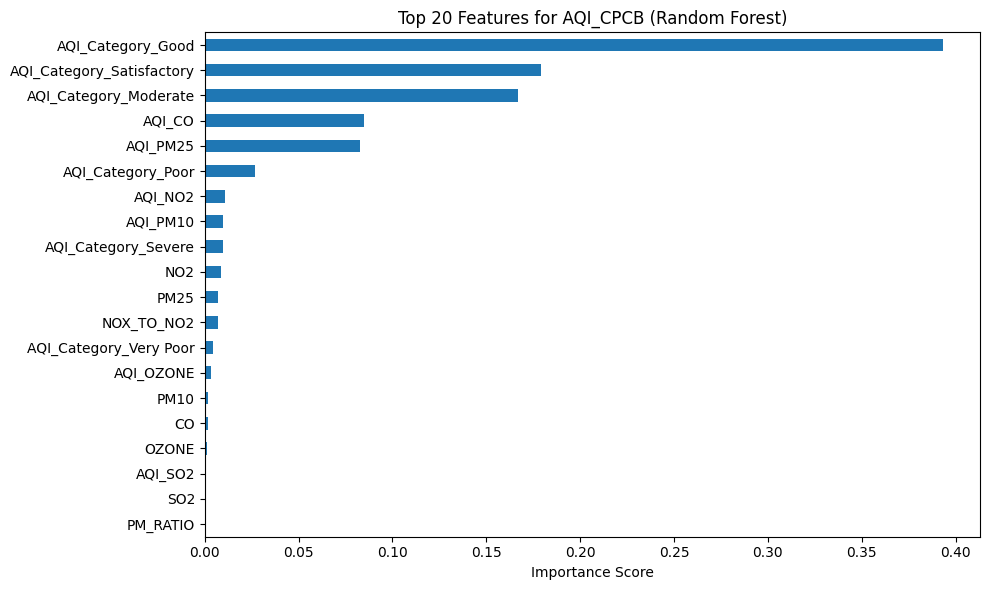

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Parameters
target_col = 'AQI_CPCB'
sample_size = 100_000  # adjust based on your memory & time constraints

# 1️⃣ Sample data
df_sample = df.sample(n=sample_size, random_state=42)

# 2️⃣ Prepare features and target
X = df_sample.drop(columns=[target_col])
# Drop datetime columns to avoid dtype errors
X = X.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]'])
# One-hot encode categorical features if any
X = pd.get_dummies(X)

y = df_sample[target_col]

# 3️⃣ Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4️⃣ Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# 5️⃣ Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# 6️⃣ Show top 20 features
print("\n🎯 Top 20 Important Features (Random Forest):")
print(importances.head(20))

# 7️⃣ Plot
plt.figure(figsize=(10, 6))
importances.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title(f"Top 20 Features for {target_col} (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [16]:
# Filter only your features of interest from the importance series
features_of_interest = [
    'Rolling_PM25_mean', 'Lag_PM25_1h',
    'Rolling_Temperature_max',
    'Rolling_PM10_mean', 'Lag_PM10_1h', 'Rolling_PM10_max_7d',
    'Rolling_NO2_mean', 'Lag_NO2_1h', 'Rolling_NO2_max_7d',
    'Rolling_CO_mean', 'Lag_CO_1h', 'Rolling_CO_max_7d',
    'Rolling_SO2_mean', 'Lag_SO2_1h', 'Rolling_SO2_max_7d'
]

importances_of_interest = importances.loc[
    importances.index.intersection(features_of_interest)
]

print(importances_of_interest.sort_values(ascending=False))


Rolling_NO2_mean           0.000011
Rolling_CO_mean            0.000008
Rolling_PM10_mean          0.000006
Rolling_SO2_mean           0.000006
Rolling_CO_max_7d          0.000004
Rolling_PM25_mean          0.000004
Rolling_SO2_max_7d         0.000003
Rolling_PM10_max_7d        0.000003
Lag_NO2_1h                 0.000003
Rolling_NO2_max_7d         0.000003
Lag_PM25_1h                0.000003
Rolling_Temperature_max    0.000003
Lag_SO2_1h                 0.000002
Lag_PM10_1h                0.000002
Lag_CO_1h                  0.000002
dtype: float64


In [17]:
!pip install optuna
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.7/733.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 4.5 MB/s eta 0:00:00


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import mlflow
import mlflow.lightgbm

# Selected features
feature_cols = [
    'AQI_CO', 'AQI_PM25', 'AQI_NO2', 'AQI_PM10',
    'NO2', 'PM25', 'NOX_TO_NO2', 'AQI_OZONE', 'PM10', 'CO',
    'Rolling_NO2_mean', 'Rolling_CO_mean', 'Rolling_PM10_mean'
]

# Target column
target_col = 'AQI_CPCB'

# Filter to features and target
X = df[feature_cols]
y = df[target_col]

# Impute missing values in features with median
print("Missing values before imputation:\n", X.isnull().sum())
X = X.fillna(X.median())
print("Missing values after imputation:\n", X.isnull().sum())

# Drop any rows with missing target values
data = pd.concat([X, y], axis=1).dropna()
X = data[feature_cols]
y = data[target_col]

print(f"Data shape after cleanup: {X.shape}")

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

# LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# LightGBM params
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42
}

# Prepare input example for MLflow model logging
input_example = X_val.iloc[:1]

# Start MLflow run
with mlflow.start_run(run_name="LightGBM Baseline with Median Impute"):
    # Log parameters
    mlflow.log_params(params)

    # Train model with callbacks
    model = lgb.train(
        params,
        train_data,
        valid_sets=[val_data],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=50)
        ]
    )

    # Predict
    y_pred = model.predict(X_val, num_iteration=model.best_iteration)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mape = (abs((y_val - y_pred) / y_val.replace(0, 1))).mean() * 100

    # Log metrics
    mlflow.log_metrics({
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "MAPE": mape
    })

    # Log model with input example
    mlflow.lightgbm.log_model(model, "model", input_example=input_example)

    print("\n✅ Evaluation Metrics:")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAE  : {mae:.4f}")
    print(f"R²   : {r2:.4f}")
    print(f"MAPE : {mape:.2f}%")


Missing values before imputation:
 AQI_CO                49942
AQI_PM25              19202
AQI_NO2                6729
AQI_PM10              11131
NO2                       0
PM25                      0
NOX_TO_NO2           314220
AQI_OZONE              5219
PM10                      0
CO                        0
Rolling_NO2_mean          0
Rolling_CO_mean           0
Rolling_PM10_mean         0
dtype: int64
Missing values after imputation:
 AQI_CO               0
AQI_PM25             0
AQI_NO2              0
AQI_PM10             0
NO2                  0
PM25                 0
NOX_TO_NO2           0
AQI_OZONE            0
PM10                 0
CO                   0
Rolling_NO2_mean     0
Rolling_CO_mean      0
Rolling_PM10_mean    0
dtype: int64
Data shape after cleanup: (1332059, 13)
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 7.18413
[100]	valid_0's rmse: 6.62909
[150]	valid_0's rmse: 6.41343
[200]	valid_0's rmse: 6.31026
[250]	valid_0's rmse: 

In [19]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
import mlflow
import mlflow.lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlflow.models.signature import infer_signature

# 1. Define your selected features and target
feature_cols = [
    'AQI_CO', 'AQI_PM25', 'AQI_NO2', 'AQI_PM10',
    'NO2', 'PM25', 'NOX_TO_NO2', 'AQI_OZONE', 'PM10', 'CO',
    'Rolling_NO2_mean', 'Rolling_CO_mean', 'Rolling_PM10_mean'
]
target_col = 'AQI_CPCB'

# 2. Prepare the dataset
X = df[feature_cols].fillna(df[feature_cols].median())
y = df[target_col]

# Drop rows with missing target values if any
data = pd.concat([X, y], axis=1).dropna()
X = data[feature_cols]
y = data[target_col]

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
'''
# 3. Define Optuna objective function
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 2047),
        'max_depth': trial.suggest_int('max_depth', 4, 32),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-3, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-3, 10.0, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'seed': 42
    }

    with mlflow.start_run(nested=True):
        mlflow.log_params(params)

        dtrain = lgb.Dataset(X_train, label=y_train)
        dvalid = lgb.Dataset(X_val, label=y_val)

        model = lgb.train(
            params,
            dtrain,
            valid_sets=[dvalid],
            num_boost_round=1000,
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=50)
            ]
        )

        y_pred = model.predict(X_val, num_iteration=model.best_iteration)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        # Prevent division by zero in MAPE calculation:
        y_val_safe = y_val.replace(0, 1)
        mape = np.mean(np.abs((y_val - y_pred) / y_val_safe)) * 100

        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mape", mape)

        return rmse

# 4. Create and run the Optuna study
study = optuna.create_study(direction="minimize")
with mlflow.start_run(run_name="Optuna_LightGBM_Tuning") as run:
    study.optimize(objective, n_trials=10)

    # 5. Train final model using best parameters found
    best_params = study.best_params
    # Add fixed parameters
    best_params.update({
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'verbosity': -1,
        'seed': 42
    })

    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_val, label=y_val)

    best_model = lgb.train(
        best_params,
        dtrain,
        valid_sets=[dvalid],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=50)
        ]
    )

    # Evaluate final model
    y_pred = best_model.predict(X_val, num_iteration=best_model.best_iteration)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    y_val_safe = y_val.replace(0, 1)
    mape = np.mean(np.abs((y_val - y_pred) / y_val_safe)) * 100

    mlflow.log_metrics({
        "final_rmse": rmse,
        "final_mae": mae,
        "final_r2": r2,
        "final_mape": mape
    })

    # Log final model with signature and example input
    signature = infer_signature(X_val, y_pred)
    mlflow.lightgbm.log_model(
        best_model,
        "model",
        signature=signature,
        input_example=X_val.head(2)
    )
'''
print("\n🎯 Best trial results:")
print(f"Best RMSE: {study.best_value:.4f}")
print("Best Parameters:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")


[I 2025-06-06 22:24:50,903] A new study created in memory with name: no-name-4f54768a-54ec-4e1b-a8da-9a29f721bf68


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 62.5801
[100]	valid_0's rmse: 54.7425
[150]	valid_0's rmse: 47.922
[200]	valid_0's rmse: 41.9775
[250]	valid_0's rmse: 36.8101
[300]	valid_0's rmse: 32.3201
[350]	valid_0's rmse: 28.4108
[400]	valid_0's rmse: 25.0259
[450]	valid_0's rmse: 22.0883
[500]	valid_0's rmse: 19.5545
[550]	valid_0's rmse: 17.3696
[600]	valid_0's rmse: 15.497
[650]	valid_0's rmse: 13.8983
[700]	valid_0's rmse: 12.5353
[750]	valid_0's rmse: 11.3821
[800]	valid_0's rmse: 10.4164
[850]	valid_0's rmse: 9.60833
[900]	valid_0's rmse: 8.94111
[950]	valid_0's rmse: 8.39175
[1000]	valid_0's rmse: 7.94282
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 7.94282


[I 2025-06-06 22:34:37,593] Trial 0 finished with value: 7.942823532991769 and parameters: {'learning_rate': 0.002720928012728246, 'num_leaves': 272, 'max_depth': 32, 'min_data_in_leaf': 49, 'lambda_l1': 0.0037914974692650426, 'lambda_l2': 0.02706019857831766, 'feature_fraction': 0.9118377103440345, 'bagging_fraction': 0.7445630179961968, 'bagging_freq': 4}. Best is trial 0 with value: 7.942823532991769.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 6.72047
[100]	valid_0's rmse: 6.4847
[150]	valid_0's rmse: 6.39649
[200]	valid_0's rmse: 6.351
[250]	valid_0's rmse: 6.32556
[300]	valid_0's rmse: 6.30202
[350]	valid_0's rmse: 6.29134
[400]	valid_0's rmse: 6.28089
[450]	valid_0's rmse: 6.27453
[500]	valid_0's rmse: 6.26909
Early stopping, best iteration is:
[477]	valid_0's rmse: 6.26749


[I 2025-06-06 22:37:00,060] Trial 1 finished with value: 6.26749026147163 and parameters: {'learning_rate': 0.22507125641864542, 'num_leaves': 174, 'max_depth': 31, 'min_data_in_leaf': 68, 'lambda_l1': 3.255889663974898, 'lambda_l2': 1.349228696010318, 'feature_fraction': 0.7906847720688912, 'bagging_fraction': 0.6460969491116111, 'bagging_freq': 3}. Best is trial 1 with value: 6.26749026147163.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 19.2921
[100]	valid_0's rmse: 8.91975
[150]	valid_0's rmse: 7.37166
[200]	valid_0's rmse: 6.95184
[250]	valid_0's rmse: 6.72465
[300]	valid_0's rmse: 6.57723
[350]	valid_0's rmse: 6.48397
[400]	valid_0's rmse: 6.41759
[450]	valid_0's rmse: 6.35102
[500]	valid_0's rmse: 6.29012
[550]	valid_0's rmse: 6.25714
[600]	valid_0's rmse: 6.22057
[650]	valid_0's rmse: 6.19261
[700]	valid_0's rmse: 6.17291
[750]	valid_0's rmse: 6.15821
[800]	valid_0's rmse: 6.1356
[850]	valid_0's rmse: 6.12191
[900]	valid_0's rmse: 6.10693
[950]	valid_0's rmse: 6.0965
[1000]	valid_0's rmse: 6.08323
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 6.08323


[I 2025-06-06 22:44:10,232] Trial 2 finished with value: 6.083233333169114 and parameters: {'learning_rate': 0.03140759589425407, 'num_leaves': 1743, 'max_depth': 11, 'min_data_in_leaf': 85, 'lambda_l1': 0.005291842680625401, 'lambda_l2': 0.05411880336239647, 'feature_fraction': 0.5102947973193157, 'bagging_fraction': 0.6730869069170204, 'bagging_freq': 10}. Best is trial 2 with value: 6.083233333169114.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 9.79861
[100]	valid_0's rmse: 7.36838
[150]	valid_0's rmse: 6.8912
[200]	valid_0's rmse: 6.62361
[250]	valid_0's rmse: 6.49632
[300]	valid_0's rmse: 6.39671
[350]	valid_0's rmse: 6.3444
[400]	valid_0's rmse: 6.30517
[450]	valid_0's rmse: 6.26566
[500]	valid_0's rmse: 6.23723
[550]	valid_0's rmse: 6.20851
[600]	valid_0's rmse: 6.18342
[650]	valid_0's rmse: 6.16582
[700]	valid_0's rmse: 6.14505
[750]	valid_0's rmse: 6.131
[800]	valid_0's rmse: 6.1174
[850]	valid_0's rmse: 6.10385
[900]	valid_0's rmse: 6.09131
[950]	valid_0's rmse: 6.0777
[1000]	valid_0's rmse: 6.06983
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 6.06983


[I 2025-06-06 22:50:30,182] Trial 3 finished with value: 6.069831644293168 and parameters: {'learning_rate': 0.056020991520021025, 'num_leaves': 273, 'max_depth': 9, 'min_data_in_leaf': 98, 'lambda_l1': 0.013116723294433726, 'lambda_l2': 1.508310106737222, 'feature_fraction': 0.6157643118466976, 'bagging_fraction': 0.8321006804171381, 'bagging_freq': 2}. Best is trial 3 with value: 6.069831644293168.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 38.4081
[100]	valid_0's rmse: 21.3846
[150]	valid_0's rmse: 13.3396
[200]	valid_0's rmse: 9.83166
[250]	valid_0's rmse: 8.43349
[300]	valid_0's rmse: 7.86809
[350]	valid_0's rmse: 7.58522
[400]	valid_0's rmse: 7.42607
[450]	valid_0's rmse: 7.31524
[500]	valid_0's rmse: 7.19609
[550]	valid_0's rmse: 7.10246
[600]	valid_0's rmse: 7.02458
[650]	valid_0's rmse: 6.95044
[700]	valid_0's rmse: 6.89523
[750]	valid_0's rmse: 6.84777
[800]	valid_0's rmse: 6.8062
[850]	valid_0's rmse: 6.76612
[900]	valid_0's rmse: 6.72823
[950]	valid_0's rmse: 6.70066
[1000]	valid_0's rmse: 6.67128
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 6.67128


[I 2025-06-06 22:55:06,095] Trial 4 finished with value: 6.671275102057971 and parameters: {'learning_rate': 0.013909085635987887, 'num_leaves': 38, 'max_depth': 8, 'min_data_in_leaf': 95, 'lambda_l1': 0.007911796738826136, 'lambda_l2': 7.122120375733457, 'feature_fraction': 0.7197712682211816, 'bagging_fraction': 0.7365412497386551, 'bagging_freq': 6}. Best is trial 3 with value: 6.069831644293168.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 6.21288
[100]	valid_0's rmse: 5.93019
[150]	valid_0's rmse: 5.87328
[200]	valid_0's rmse: 5.84293
[250]	valid_0's rmse: 5.82301
[300]	valid_0's rmse: 5.8191
[350]	valid_0's rmse: 5.81705
[400]	valid_0's rmse: 5.81583
[450]	valid_0's rmse: 5.81395
Early stopping, best iteration is:
[442]	valid_0's rmse: 5.81332


[I 2025-06-06 23:01:31,297] Trial 5 finished with value: 5.813318210115349 and parameters: {'learning_rate': 0.08845678690090503, 'num_leaves': 640, 'max_depth': 23, 'min_data_in_leaf': 98, 'lambda_l1': 0.30137067845666576, 'lambda_l2': 0.00790586727986332, 'feature_fraction': 0.9811882287698017, 'bagging_fraction': 0.9292335888305305, 'bagging_freq': 2}. Best is trial 5 with value: 5.813318210115349.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 15.0169
[100]	valid_0's rmse: 9.1319
[150]	valid_0's rmse: 8.19333
[200]	valid_0's rmse: 7.80928
[250]	valid_0's rmse: 7.58048
[300]	valid_0's rmse: 7.39149
[350]	valid_0's rmse: 7.24877
[400]	valid_0's rmse: 7.17878
[450]	valid_0's rmse: 7.09098
[500]	valid_0's rmse: 6.99762
[550]	valid_0's rmse: 6.9217
[600]	valid_0's rmse: 6.88277
[650]	valid_0's rmse: 6.84275
[700]	valid_0's rmse: 6.81644
[750]	valid_0's rmse: 6.7872
[800]	valid_0's rmse: 6.75103
[850]	valid_0's rmse: 6.72531
[900]	valid_0's rmse: 6.70448
[950]	valid_0's rmse: 6.69117
[1000]	valid_0's rmse: 6.6761
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 6.6761


[I 2025-06-06 23:04:47,732] Trial 6 finished with value: 6.676103987060881 and parameters: {'learning_rate': 0.045050607661235906, 'num_leaves': 1471, 'max_depth': 5, 'min_data_in_leaf': 25, 'lambda_l1': 0.001390790816884231, 'lambda_l2': 2.004198305200149, 'feature_fraction': 0.6213493295350927, 'bagging_fraction': 0.6378531886031317, 'bagging_freq': 8}. Best is trial 5 with value: 5.813318210115349.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 8.80382
[100]	valid_0's rmse: 6.17258
[150]	valid_0's rmse: 6.00103
[200]	valid_0's rmse: 5.9392
[250]	valid_0's rmse: 5.90053
[300]	valid_0's rmse: 5.87574
[350]	valid_0's rmse: 5.85539
[400]	valid_0's rmse: 5.8383
[450]	valid_0's rmse: 5.82777
[500]	valid_0's rmse: 5.81753
[550]	valid_0's rmse: 5.80817
[600]	valid_0's rmse: 5.80174
[650]	valid_0's rmse: 5.79483
[700]	valid_0's rmse: 5.79017
[750]	valid_0's rmse: 5.78451
[800]	valid_0's rmse: 5.77925
[850]	valid_0's rmse: 5.77623
[900]	valid_0's rmse: 5.77429
[950]	valid_0's rmse: 5.77309
[1000]	valid_0's rmse: 5.76926
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 5.76923


[I 2025-06-06 23:09:31,906] Trial 7 finished with value: 5.769233616244889 and parameters: {'learning_rate': 0.04884411164221402, 'num_leaves': 200, 'max_depth': 27, 'min_data_in_leaf': 63, 'lambda_l1': 1.0702764814616916, 'lambda_l2': 2.5809342513468176, 'feature_fraction': 0.9669515630031549, 'bagging_fraction': 0.9558138154268565, 'bagging_freq': 1}. Best is trial 7 with value: 5.769233616244889.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 7.66266
[100]	valid_0's rmse: 7.5475
[150]	valid_0's rmse: 7.53072
[200]	valid_0's rmse: 7.52897
[250]	valid_0's rmse: 7.52259
Early stopping, best iteration is:
[244]	valid_0's rmse: 7.51897


[I 2025-06-06 23:10:59,540] Trial 8 finished with value: 7.518970121684657 and parameters: {'learning_rate': 0.2795378401902285, 'num_leaves': 561, 'max_depth': 32, 'min_data_in_leaf': 14, 'lambda_l1': 8.742224084624125, 'lambda_l2': 0.001328358643453451, 'feature_fraction': 0.6270812522432803, 'bagging_fraction': 0.6178350865714854, 'bagging_freq': 10}. Best is trial 7 with value: 5.769233616244889.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 7.67567
[100]	valid_0's rmse: 6.9705
[150]	valid_0's rmse: 6.7798
[200]	valid_0's rmse: 6.66593
[250]	valid_0's rmse: 6.56632
[300]	valid_0's rmse: 6.51866
[350]	valid_0's rmse: 6.47759
[400]	valid_0's rmse: 6.44358
[450]	valid_0's rmse: 6.41149
[500]	valid_0's rmse: 6.38189
[550]	valid_0's rmse: 6.36156
[600]	valid_0's rmse: 6.34059
[650]	valid_0's rmse: 6.3247
[700]	valid_0's rmse: 6.30563
[750]	valid_0's rmse: 6.29668
[800]	valid_0's rmse: 6.28847
[850]	valid_0's rmse: 6.28079
[900]	valid_0's rmse: 6.27688
[950]	valid_0's rmse: 6.26793
[1000]	valid_0's rmse: 6.258
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 6.258


[I 2025-06-06 23:15:55,130] Trial 9 finished with value: 6.258003525137699 and parameters: {'learning_rate': 0.21588121420083345, 'num_leaves': 1028, 'max_depth': 7, 'min_data_in_leaf': 81, 'lambda_l1': 0.0870786469841463, 'lambda_l2': 0.01652858277756936, 'feature_fraction': 0.5931004147521137, 'bagging_fraction': 0.9042535608635405, 'bagging_freq': 7}. Best is trial 7 with value: 5.769233616244889.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 8.80382
[100]	valid_0's rmse: 6.17258
[150]	valid_0's rmse: 6.00103
[200]	valid_0's rmse: 5.9392
[250]	valid_0's rmse: 5.90053
[300]	valid_0's rmse: 5.87574
[350]	valid_0's rmse: 5.85539
[400]	valid_0's rmse: 5.8383
[450]	valid_0's rmse: 5.82777
[500]	valid_0's rmse: 5.81753
[550]	valid_0's rmse: 5.80817
[600]	valid_0's rmse: 5.80174
[650]	valid_0's rmse: 5.79483
[700]	valid_0's rmse: 5.79017
[750]	valid_0's rmse: 5.78451
[800]	valid_0's rmse: 5.77925
[850]	valid_0's rmse: 5.77623
[900]	valid_0's rmse: 5.77429
[950]	valid_0's rmse: 5.77309
[1000]	valid_0's rmse: 5.76926
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 5.76923

🎯 Best trial results:
Best RMSE: 5.7692
Best Parameters:
  learning_rate: 0.04884411164221402
  num_leaves: 200
  max_depth: 27
  min_data_in_leaf: 63
  lambda_l1: 1.0702764814616916
  lambda_l2: 2.5809342513468176
  feature_fraction: 0.9669515630031549
  baggin

In [21]:
# ✅ Final Model Training using Best Parameters from Optuna
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'seed': 42,
    'learning_rate': 0.04884411164221402,
    'num_leaves': 200,
    'max_depth': 27,
    'min_data_in_leaf': 63,
    'lambda_l1': 1.0702764814616916,
    'lambda_l2': 2.5809342513468176,
    'feature_fraction': 0.9669515630031549,
    'bagging_fraction': 0.9558138154268565,
    'bagging_freq': 1
}

with mlflow.start_run(run_name="FinalModel_ManualParams"):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_val, label=y_val)

    model = lgb.train(
        best_params,
        dtrain,
        valid_sets=[dvalid],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=50)
        ]
    )

    y_pred = model.predict(X_val, num_iteration=model.best_iteration)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mape = np.mean(np.abs((y_val - y_pred) / y_val.replace(0, 1))) * 100

    mlflow.log_metrics({
        "final_rmse": rmse,
        "final_mae": mae,
        "final_r2": r2,
        "final_mape": mape
    })

    mlflow.lightgbm.log_model(
        model, "model",
        signature=infer_signature(X_val, y_pred),
        input_example=X_val.head(2)
    )

    print("\n✅ Final Model Evaluation:")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAE  : {mae:.4f}")
    print(f"R²   : {r2:.4f}")
    print(f"MAPE : {mape:.2f}%")


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 8.80382
[100]	valid_0's rmse: 6.17258
[150]	valid_0's rmse: 6.00103
[200]	valid_0's rmse: 5.9392
[250]	valid_0's rmse: 5.90053
[300]	valid_0's rmse: 5.87574
[350]	valid_0's rmse: 5.85539
[400]	valid_0's rmse: 5.8383
[450]	valid_0's rmse: 5.82777
[500]	valid_0's rmse: 5.81753
[550]	valid_0's rmse: 5.80817
[600]	valid_0's rmse: 5.80174
[650]	valid_0's rmse: 5.79483
[700]	valid_0's rmse: 5.79017
[750]	valid_0's rmse: 5.78451
[800]	valid_0's rmse: 5.77925
[850]	valid_0's rmse: 5.77623
[900]	valid_0's rmse: 5.77429
[950]	valid_0's rmse: 5.77309
[1000]	valid_0's rmse: 5.76926
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 5.76923

✅ Final Model Evaluation:
RMSE : 5.7692
MAE  : 1.4622
R²   : 0.9935
MAPE : 4.97%


In [22]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Get experiment by name
experiment = client.get_experiment_by_name("Default")

if experiment is None:
    print("❌ No experiment named 'Default' found.")
else:
    runs = client.search_runs(
        experiment_ids=[experiment.experiment_id],
        order_by=["start_time DESC"],
        max_results=1
    )

    if not runs:
        print("❌ No runs found in the 'Default' experiment.")
    else:
        latest_run = runs[0]
        print("\n📦 Latest MLflow Run ID:", latest_run.info.run_id)
        print("✅ MLflow Logged Metrics:")
        for key, value in latest_run.data.metrics.items():
            print(f"{key} : {value:.4f}")



📦 Latest MLflow Run ID: 9c966145016c496cb49b0ff844a12b4e
✅ MLflow Logged Metrics:
final_mae : 1.4622
final_rmse : 5.7692
final_r2 : 0.9935
final_mape : 4.9658


In [23]:
from mlflow.tracking import MlflowClient

# Initialize MLflow client
client = MlflowClient()

# Get experiment by name
experiment = client.get_experiment_by_name("Default")

if experiment is None:
    print("❌ No experiment named 'Default' found.")
else:
    runs = client.search_runs(
        experiment_ids=[experiment.experiment_id],
        order_by=["start_time DESC"],
        max_results=1
    )

    if not runs:
        print("❌ No runs found in the 'Default' experiment.")
    else:
        latest_run = runs[0]

        # Print Experiment Name and Run ID
        print(f"\n🔍 Experiment Name: {experiment.name}")
        print("📦 Latest MLflow Run ID:", latest_run.info.run_id)

        # Print Metrics
        print("\n✅ MLflow Logged Metrics:")
        for key, value in latest_run.data.metrics.items():
            print(f"{key} : {value:.4f}")

        # Print Parameters
        print("\n✅ MLflow Logged Parameters:")
        for key, value in latest_run.data.params.items():
            print(f"{key} : {value}")




🔍 Experiment Name: Default
📦 Latest MLflow Run ID: 9c966145016c496cb49b0ff844a12b4e

✅ MLflow Logged Metrics:
final_mae : 1.4622
final_rmse : 5.7692
final_r2 : 0.9935
final_mape : 4.9658

✅ MLflow Logged Parameters:


In [24]:
from datetime import datetime
start = datetime.fromtimestamp(latest_run.info.start_time / 1000)
print("🕒 Run started at:", start.strftime('%Y-%m-%d %H:%M:%S'))


🕒 Run started at: 2025-06-06 23:25:13


In [31]:
import joblib

# Save to Colab's local filesystem
joblib.dump(best_model, "LightGBM_AQI_Regression.pkl")

# Download it to your system
from google.colab import files
files.download("LightGBM_AQI_Regression.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# Check unique categories and their counts
print("Unique AQI categories and counts:")
print(df['AQI_Category'].value_counts(dropna=False))

# Check for null values
null_count = df['AQI_Category'].isnull().sum()
print(f"\nNumber of null values in AQI_Category: {null_count}")

# Basic info about the column
print(f"\nTotal rows in AQI_Category column: {len(df['AQI_Category'])}")
print(f"Non-null rows: {df['AQI_Category'].notnull().sum()}")


Unique AQI categories and counts:
AQI_Category
Good            702353
Satisfactory    395049
Moderate        176300
Poor             24184
Very Poor        20623
Severe           13550
Name: count, dtype: int64

Number of null values in AQI_Category: 0

Total rows in AQI_Category column: 1332059
Non-null rows: 1332059


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
import mlflow
import mlflow.lightgbm
from mlflow.models.signature import infer_signature
import joblib
import os
from google.colab import files

# 1. Define features and target
feature_cols = [
    'AQI_CO', 'AQI_PM25', 'AQI_NO2', 'AQI_PM10',
    'NO2', 'PM25', 'NOX_TO_NO2', 'AQI_OZONE', 'PM10', 'CO',
    'Rolling_NO2_mean', 'Rolling_CO_mean', 'Rolling_PM10_mean'
]
target_col = 'AQI_Category'

# 2. Prepare dataset
X = df[feature_cols].fillna(df[feature_cols].median())
y = df[target_col]

# Remove rows with missing target values
data = pd.concat([X, y], axis=1).dropna()
X = data[feature_cols]
y = data[target_col]

# 3. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Split data
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 5. Prepare LightGBM Datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# 6. LightGBM parameters
params = {
    'objective': 'multiclass',
    'num_class': len(le.classes_),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42
}

# 7. MLflow tracking
with mlflow.start_run(run_name="LightGBM AQI Category Classifier"):

    mlflow.log_params(params)

    model = lgb.train(
        params,
        train_data,
        valid_sets=[val_data],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=10)
        ]
    )

    # Predict on validation set
    y_pred_probs = model.predict(X_val, num_iteration=model.best_iteration)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Evaluate
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, target_names=le.classes_)
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Log accuracy
    mlflow.log_metric("accuracy", accuracy)

    # Log model with input_example and signature
    input_example = X_val.head(2)
    signature = infer_signature(X_val, y_pred_probs)
    mlflow.lightgbm.log_model(
        model,
        "model",
        input_example=input_example,
        signature=signature
    )

    print("\n✅ Classification Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", conf_matrix)

    # Save LabelEncoder locally in Colab
    encoder_path = "label_encoder.pkl"
    joblib.dump(le, encoder_path)
    print(f"\n📦 LabelEncoder saved as: {encoder_path}")

    # Trigger file download
    files.download(encoder_path)


Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.166961
[20]	valid_0's multi_logloss: 0.064053
[30]	valid_0's multi_logloss: 0.0448353
[40]	valid_0's multi_logloss: 0.0401942
[50]	valid_0's multi_logloss: 0.0384265
[60]	valid_0's multi_logloss: 0.0375662
[70]	valid_0's multi_logloss: 0.0471331
[80]	valid_0's multi_logloss: 0.064203
[90]	valid_0's multi_logloss: 0.0827101
[100]	valid_0's multi_logloss: 0.080245
[110]	valid_0's multi_logloss: 0.154981
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.0372728

✅ Classification Metrics:
Accuracy: 0.9894

Classification Report:
               precision    recall  f1-score   support

        Good       0.99      1.00      0.99    140471
    Moderate       0.99      0.97      0.98     35260
        Poor       0.97      0.92      0.95      4837
Satisfactory       0.99      0.99      0.99     79010
      Severe       0.99      0.98      0.98      2710
   Very Poor       0.97      0.98

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import joblib
from google.colab import files

# Save model in Colab's local environment
classifier_model_path = "LightGBM_AQI_Classifier.pkl"
joblib.dump(model, classifier_model_path)

# Download the saved model to your PC
files.download(classifier_model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
print("✅ All models trained & saved successfully! 🚀 You're all set.\n🎯 Next step: Build the interactive Desktop App with PySide6! 🖥️🌿")


✅ All models trained & saved successfully! 🚀 You're all set.
🎯 Next step: Build the interactive Desktop App with PySide6! 🖥️🌿
